In [1]:
from analytic_psfs import Mie_Theory
from analytic_psfs import Plot_Everything
from analytic_psfs import Photothermal_Image

import numpy as np
import matplotlib.pyplot as plt

# Optimize zp for every power

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.,4.),sharex=True)
fig_zp, ax_zp = plt.subplots(1, 3, figsize=(9.3,1.8),sharex=True)

radius = np.array([10, 20, 75])*1E-7
wave_pump = np.array([532.E-7])
wave_probe = np.array([785.E-7])
whichalpha='coreshell_MW'
nTOT = 10
nb = 1.473
power_range = np.arange(1, 1101, 100) # microwatts
zp_allowed = np.arange(-1000, 1000, 10)*1E-7
print(type(zp_allowed))
pe = Plot_Everything(radius, nb)
norm=True
P0_probe=500*10
norm_sig=True

for idxr, rad_val in enumerate(radius):
    total_signal_max = np.zeros(len(power_range))
    ISIN_max = np.zeros(len(power_range))
    ICOS_max = np.zeros(len(power_range))
    S1SIN_max = np.zeros(len(power_range))
    S2SIN_max = np.zeros(len(power_range))
    S1COS_max = np.zeros(len(power_range))
    S2COS_max = np.zeros(len(power_range))
    zp_max = np.zeros(len(power_range))
    ######################################################    
    ### Mie Theory ###
    mt_single = Mie_Theory(radius=rad_val, nb=nb, selected_waves=wave_pump)
    abs_cross, _, _ = mt_single.cross_sects(nTOT=nTOT)
    ### Find Optimal zp ###
    for idx_p, val_pow in enumerate(power_range):
        pt = Photothermal_Image(radius=rad_val, wave_pump=wave_pump,
                                 abs_cross=abs_cross, P0h=val_pow*10, wave_probe=wave_probe,
                                 kind=whichalpha, nb_T0=nb, define_zp=zp_allowed)
        
        I_sin, S1_sin, S2_sin, _ = pt.pt_signal(which='sin',norm=norm_sig,P0_probe=P0_probe)
        I_cos, S1_cos, S2_cos, _ = pt.pt_signal(which='cos',norm=norm_sig,P0_probe=P0_probe)
        total_signal = np.sqrt( (I_sin + S1_sin + S2_sin)**2 +\
                                (I_cos + S1_cos + S2_cos)**2)

        zp_idx_max = np.where(total_signal == max(total_signal))
        zp_max[idx_p] = zp_allowed[zp_idx_max]
        total_signal_max[idx_p] = total_signal[zp_idx_max]
        ISIN_max[idx_p] = I_sin[zp_idx_max]
        ICOS_max[idx_p] = I_cos[zp_idx_max]
        S1SIN_max[idx_p] = S1_sin[zp_idx_max]
        S2SIN_max[idx_p] = S2_sin[zp_idx_max]
        S1COS_max[idx_p] = S1_cos[zp_idx_max]
        S2COS_max[idx_p] = S2_cos[zp_idx_max]

    colors = ['green', 'firebrick', 'navy']
    if norm == True:
        ax.plot(power_range, total_signal_max\
            /max(total_signal_max),
            label=str(int(2*rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('Normalized PT Signal')
    if norm == False:
        ax.plot(power_range, total_signal_max,
            label=str('r = ')+str(int(rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('PT Signal')
    # Plot zp selected
    ax_zp[idxr].plot(power_range, zp_max*1E7)
    ax_zp[idxr].set_title(str(int(np.round(2*rad_val*1E7)))+str(' nm'), pad=20)
    ax_zp[idxr].set_ylabel('$z_p$ [nm]')
    ax_zp[idxr].set_xlabel('Heating Laser Power [$\mu$W]')

    
    
    
    
ax.set_xlabel('Heating Laser Power [$\mu$W]')
ax.legend(frameon=False)
fig.subplots_adjust(left=.2, bottom=.2)
fig_zp.subplots_adjust(wspace=.4) 


ax.set_xlim([0,1000]);
fig.savefig(str('power_sweep_atmaxzp.png'), 
    dpi=500, bbox_inches='tight')


    
    
    

# Optimize zp for just ONE power

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.,4.),sharex=True)

radius = np.array([10, 20, 75])*1E-7
power_for_zp_max = np.array([300, 100, 100])


wave_pump = np.array([532.E-7])
wave_probe = np.array([785.E-7])
whichalpha='coreshell_MW'
nTOT = 10
nb = 1.473
power_range = np.arange(1, 1101, 100) # microwatts
zp_allowed = np.arange(-1000, 1000, 10)*1E-7
pe = Plot_Everything(radius, nb)
norm=True
P0_probe=500*10 #uW -> cgs units
norm_sig=True


for idxr, rad_val in enumerate(radius):
    total_signal_max = np.zeros(len(power_range))
    zp_max = np.zeros(len(radius))
    ######################################################    
    ### Mie Theory ###
    mt_single = Mie_Theory(radius=rad_val, nb=nb, selected_waves=wave_pump)
    abs_cross, _, _ = mt_single.cross_sects(nTOT=nTOT)

    ### Find zp at specified power. Save it and use it later. ###
    pt_findzp = Photothermal_Image(radius=rad_val, wave_pump=wave_pump,
                             abs_cross=abs_cross, P0h=power_for_zp_max[idxr]*10, wave_probe=wave_probe,
                             kind=whichalpha, nb_T0=nb, define_zp=zp_allowed)

    I_sin, S1_sin, S2_sin, _ = pt_findzp.pt_signal(which='sin',norm=norm_sig, P0_probe=P0_probe)
    I_cos, S1_cos, S2_cos, _ = pt_findzp.pt_signal(which='cos',norm=norm_sig, P0_probe=P0_probe)
    total_signal = np.sqrt( (I_sin + S1_sin + S2_sin)**2 +\
                            (I_cos + S1_cos + S2_cos)**2)
    zp_idx_max = np.where(total_signal == max(total_signal))
    zp_max[idxr] = zp_allowed[zp_idx_max]

    ### Calculate PT signal for actual zp val. ###
    pt = Photothermal_Image(radius=rad_val, wave_pump=wave_pump,
                             abs_cross=abs_cross, P0h=power_range*10, wave_probe=wave_probe,
                             kind=whichalpha, nb_T0=nb, define_zp=np.array([zp_max[idxr]]))
    
    I_sin, S1_sin, S2_sin, _ = pt.pt_signal(which='sin',norm=norm_sig, P0_probe=P0_probe)
    I_cos, S1_cos, S2_cos, _ = pt.pt_signal(which='cos',norm=norm_sig, P0_probe=P0_probe)
    total_signal_final = np.sqrt( (I_sin + S1_sin + S2_sin)**2 +\
                            (I_cos + S1_cos + S2_cos)**2)
    
    colors = ['green', 'firebrick', 'navy']
    if norm == True:
        ax.plot(power_range, total_signal_final\
            /max(total_signal_final),
            label=str(int(2*rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('Normalized PT Signal')
    if norm == False:
        ax.plot(power_range, total_signal_final,
            label=str('r = ')+str(int(rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('PT Signal')
    
ax.set_xlabel('Heating Laser Power [$\mu$W]')
ax.legend(frameon=False)
fig.subplots_adjust(left=.2, bottom=.2)


ax.set_xlim([0,1000]);
fig.savefig(str('power_sweep_atmaxzp.png'), 
    dpi=500, bbox_inches='tight')


  

# Pick a zp

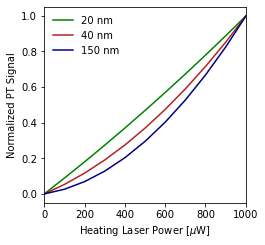

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4.,4.),sharex=True)

radius = np.array([10, 20, 75])*1E-7
define_zp = np.array([400])*1E-7


wave_pump = np.array([532.E-7])
wave_probe = np.array([785.E-7])
whichalpha='coreshell_MW'
nTOT = 10
nb = 1.473
power_range = np.arange(1, 1101, 100) # microwatts
pe = Plot_Everything(radius, nb)
norm=True
P0_probe=500*10 #uW -> cgs units
norm_sig=False


for idxr, rad_val in enumerate(radius):
    total_signal_max = np.zeros(len(power_range))
    zp_max = np.zeros(len(radius))
    ######################################################    
    ### Mie Theory ###
    mt_single = Mie_Theory(radius=rad_val, nb=nb, selected_waves=wave_pump)
    abs_cross, _, _ = mt_single.cross_sects(nTOT=nTOT)

    ### Calculate PT signal for actual zp val. ###
    pt = Photothermal_Image(radius=rad_val, wave_pump=wave_pump,
                             abs_cross=abs_cross, P0h=power_range*10, wave_probe=wave_probe,
                             kind=whichalpha, nb_T0=nb, define_zp=define_zp)
    
    I_sin, S1_sin, S2_sin, _ = pt.pt_signal(which='sin',norm=norm_sig, P0_probe=P0_probe)
    I_cos, S1_cos, S2_cos, _ = pt.pt_signal(which='cos',norm=norm_sig, P0_probe=P0_probe)
    total_signal_final = np.sqrt( (I_sin + S1_sin + S2_sin)**2 +\
                            (I_cos + S1_cos + S2_cos)**2)
    
    colors = ['green', 'firebrick', 'navy']
    if norm == True:
        ax.plot(power_range, total_signal_final\
            /max(total_signal_final),
            label=str(int(2*rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('Normalized PT Signal')
    if norm == False:
        ax.plot(power_range, total_signal_final,
            label=str('r = ')+str(int(rad_val*1E7))+str(' nm'),
            color=colors[idxr])
        ax.set_ylabel('PT Signal')
    
ax.set_xlabel('Heating Laser Power [$\mu$W]')
ax.legend(frameon=False)
fig.subplots_adjust(left=.2, bottom=.2)


ax.set_xlim([0,1000]);
fig.savefig(str('power_sweep_atmaxzp.png'), 
    dpi=500, bbox_inches='tight')
